In [3]:
##########################################################################
##########################################################################
#This file is designed to plot animation of all 17 clusters using the file total_data_all_clusters_all_snapshots.pkl that contains tracked data of all clusters

from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import os
import pickle
import matplotlib
import matplotlib.colors as colors
from matplotlib import rc #to use Latex math symbols like 'phi'
import astropy
from astropy.io import ascii
import astropy
from astropy.io import ascii
import matplotlib
import pdb
from importlib import reload

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rc('text', usetex=False)
#############################################################################
#constants
#############################################################################

MsunToGm = 1.99e33
KpcToCm = 3.086e21
mp = 1.67e-24
#bin_edge = 10.
bin_edge = 30.

bins = np.arange(-25,25,0.1)

############################################################################
#read in sim files and find relevant particles
############################################################################
#STAMPEDE
simname = 'm12i_res7100_mhdcv'
simtype="fire2"

datapath="./fire2_data_pkl/" #this is teh path where the data of our tracked clusters is
gas_datapath="./fire2_gas_data_pkl/"

plot_path="./plots/" #creating a path to store the plots only if it does not exist
if not os.path.exists(plot_path):
  os.makedirs(plot_path)

data_start=596
data_end=689



fn_clusters_initial="chem_clusters_at_snapshot_"+str(data_start)+".pkl" 
fn_clusters_later="chem_clusters_at_snapshot_"+str(data_end)+".pkl" 

with open(datapath+fn_clusters_initial, "rb") as input:
    initial_data= pickle.load(input)

with open(datapath+fn_clusters_later, "rb") as input:
    later_data= pickle.load(input)

#print("########################## TEST: This is cluster data from second cluster",cluster_data[1])
print("####################### Total clusters present is",len(initial_data))
print("\n############## Keys to access the data: \n",initial_data[1].keys())


#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue','blueviolet','darkgreen'] #19 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue'] #17 colors
#colors=['cyan','blue','green','magenta','yellow','teal','brown','tan','lime','red'] #10 colors

#total_clusters=10 #just in case you want to change the no. of clusters. Setting 10 means select the first 10
############################
############################

####################### Total clusters present is 17

############## Keys to access the data: 
 dict_keys(['ind_tracked', 'age_tracked', 'x_tracked', 'y_tracked', 'z_tracked', 'vx_tracked', 'vy_tracked', 'vz_tracked', 'mass_tracked', 'xcm', 'ycm', 'zcm', 'delta_rxyz', 'rmax', 'ymax', 'ymin', 'xmax', 'xmin', 'avg_delta_rxyz', 'vR_cyl_tracked', 'vphi_cyl_tracked', 'vz_cyl_tracked', 'feh_tracked', 'mgh_tracked'])


In [8]:
print(later_data[1]["feh_tracked"])


total_clusters=len(later_data)
cluster_count=0

mean_feh=list()

for i in range(total_clusters):
    f=later_data[cluster_count+1]["feh_tracked"]
    m_feh=np.mean(f)
    mean_feh.append(m_feh)
    cluster_count+=1

print(mean_feh)

[0.09803305 0.09965707 0.09805354 0.09007984 0.07674708 0.09065386
 0.10287388 0.09554125 0.09273922 0.09322701 0.09436975 0.09697872
 0.08908184 0.09110764 0.09177971 0.0944389  0.09162383 0.09370109
 0.09675691 0.09719438 0.04615055 0.09300376 0.09381473 0.08860129
 0.09847031 0.09589975 0.0918057  0.09360494 0.09852581 0.11039131
 0.09316292 0.09531304 0.09214049 0.09109958 0.09268335 0.10422319
 0.08834601 0.0918771  0.09092426 0.10520053 0.10699052 0.0876083
 0.09602804]
[0.09350009, 0.102830574, 0.13277403, 0.12343507, 0.14004464, 0.17523344, 0.12956221, 0.11548301, 0.22962283, 0.13842161, 0.14768435, 0.12666075, 0.32898328, 0.22855209, 0.11719315, 0.19592524, 0.09731805]


/data0/sw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


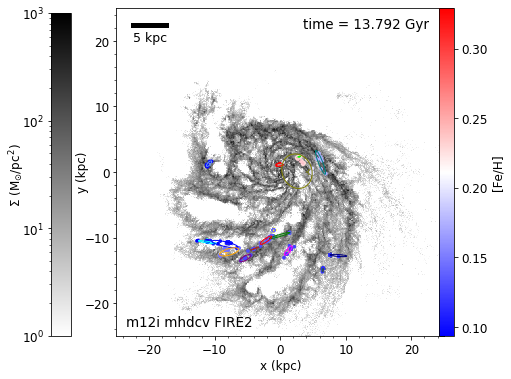

The last image that was Saved is:  689ellipse_with_metallicity.png


In [16]:
from skimage.measure import EllipseModel
from matplotlib.patches import Ellipse

colors=['cyan','blue','green','magenta','yellow','teal','brown','darkslategray','lime','red','orange','purple','rosybrown','pink','navy','olive','cornflowerblue']
##################################
snapshot_initial=596
snapshot_final=689


fig11=plt.figure()

snapnumber=snapshot_final

fn_clusters_later="chem_clusters_at_snapshot_"+str(data_end)+".pkl" 
with open(datapath+fn_clusters_later, "rb") as input:
    later_data= pickle.load(input)
    
#print("Reading from the file: ",fn_clusters_later)
total_clusters=len(later_data)
cluster_count=0
fig11.set_size_inches(7,7)
ax=fig11.add_axes([0.17, 0.185, 0.65, 0.65]) #left, bottom, width, height

for i in range(total_clusters):

    x=later_data[cluster_count+1]["x_tracked"]
    y=later_data[cluster_count+1]["y_tracked"]
    z=later_data[cluster_count+1]["z_tracked"]

    xcm=later_data[cluster_count+1]["xcm"]
    ycm=later_data[cluster_count+1]["ycm"]
    rmax=later_data[cluster_count+1]["rmax"]
    
    feh=later_data[cluster_count+1]["feh_tracked"]
    mean_f=np.mean(feh)
    mean_feh_arr=np.ones(len(x))*mean_f
    dists=((xcm-x)**2+(ycm-y)**2)**(1/2) #dists is an array that stores distance from cm to each point serially
    dists_max=np.max(dists) #finding the maximum value of distance in the dist array
    dists_min=np.min(dists) #finding the minimum value of distance in the dist array

    max_location=np.where(dists==dists_max) #finding the location in the dists array where the max distance is at to find the point
    min_location=np.where(dists==dists_min) #finding the location of min distance to find the point where the min distance is

    max_point_x=x[max_location] #extracting is the x and y position of the max point Note: it is still an array
    max_point_y=y[max_location]

    min_point_x=x[min_location] #extracting is the x and y position of the min point Note: it is still an array
    min_point_y=y[min_location]

    angle=(max_point_y[0]-min_point_y[0])/(max_point_x[0]-min_point_x[0]) #slope of the line joining max and min points

    #x=x*-1
    #y=y*-1
    #xcm=xcm*-1
    #ycm=ycm*-1

    slope=np.arctan(angle)
    ax.scatter(xcm,ycm,marker="+",c=colors[cluster_count],alpha=0.7)
    cb2=ax.scatter(x,y,label="cluster_group"+str(cluster_count+1),c=mean_feh_arr,s=7,cmap=plt.cm.get_cmap('bwr'), vmin=np.min(mean_feh),vmax=np.max(mean_feh))
    #ax.scatter(np.abs(xcm),np.abs(ycm),c="black")
    ax.minorticks_on()
    ax.tick_params(labelsize=12)
    ax.set_xlabel("x (kpc)",fontsize=12,labelpad=3)
    ax.set_ylabel("y (kpc)",fontsize=12,labelpad=-5)
    #ax.set_title("Clusters after ~100 Myrs")
    #ax.set_xlim(-20,20)
    #ax.set_ylim(-20,20)
    xy=zip(x,y)
    xy_array=np.array(tuple(xy))

    ####

    ell = EllipseModel()
    e=ell.estimate(xy_array)
    if(e==True):
        #print("success")
        xc, yc, a, b, theta = ell.params
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
        #print(b,a)
        if (b>a):
            arr=a/b
        elif(b<a):
            arr=b/a
        #print(arr)

    elif(e==False):
        #print("Failed")
        xc=xcm
        yc=ycm
        theta=slope
        a=rmax
        b=rmax/3
        ell_patch = Ellipse((xc, yc), 2*a, 2*b, theta*180/np.pi, edgecolor=colors[cluster_count], facecolor='none')
        ax.add_patch(ell_patch)
        #arr=np.nan
        arr=b/a
  
    cluster_count+=1 

#ax.legend(bbox_to_anchor=(1,0.5), loc='center left')
#fig1.subplots_adjust(right=1.5)    
#fig11.legend((s1), ("vphi_cyl"),"lower right")
#fig11.suptitle("This is the title \n")

##################
##################
#Loading the gas data
file_name=simtype+"_gas_data"+str(snapnumber)+".pkl"
#print("\nReading gas data from the file: ",file_name)
with open(gas_datapath+file_name, "rb") as input:
  import_gasdata = pickle.load(input)

#v=import_gasdata["v"]
face=import_gasdata["face"]
#xh=import_gasdata["xh"]
#yh=import_gasdata["yh"]
snaptime=import_gasdata["snaptime"]
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000) #the color range plotted
im = ax.imshow(face/(((bins[1]-bins[0])*1000)**2),origin='lower',interpolation='nearest',norm=norm,extent=(-25,25,-25,25),cmap='binary') 



cbar_ax = fig11.add_axes([0.81, 0.185, 0.03, 0.65]) # position of the colorbar (left, bottom, width, height)
fig11.colorbar(cb2, cax=cbar_ax)
cbar_ax.set_ylabel('[Fe/H]')
cbar_ax.yaxis.label.set_size(12)



#colorbar for the background gas density
cmap_gray = matplotlib.cm.get_cmap('binary')
norm1 = matplotlib.colors.LogNorm(vmin=1,vmax=1000)
cbar_ax1 = fig11.add_axes([0.04, 0.185, 0.04, 0.64]) # position of gray colorbar (left, bottom, width, height)
cb1 = fig11.colorbar(im, cax=cbar_ax1, ticklocation='left')
cb1.set_label('$\Sigma$ (M$_{{\odot}}$/pc$^2$)', labelpad=-5, fontsize=12)
#plot a scale bar 5 kpc long
ax.plot([-22.5,-17.5], [22.5,22.5], 'k-', linewidth=5)
label1 = "5 kpc"
ax.text(-22.5, 20, label1, fontsize=12.5)

#label the name of the galaxy on plot 
#label_simname="m12i mhdcv"
#ax.text(10,-23.5,label_simname,fontsize=13.5)
label2="m12i mhdcv "+simtype.upper() 
ax.text(-23.5,-23.5,label2,fontsize=13.5) 

#label the time from the snapshot_times.txt file
label3 = 'time = ' + f'{snaptime:.3f}' + ' Gyr'
ax.text(3.5,22,label3,fontsize=13.5) #display at the top right  
#ax.text(-23.5,-21,label3,fontsize=13.5) #display time on the bottom left above simtype


img_name=str(snapnumber)+"ellipse_with_metallicity.png"
fig11.savefig(img_name,bbox_inches='tight',dpi=200)
#print("Generated the plot and saved the figure as: ",img_name,end="\r",flush=True)
plt.tight_layout()
plt.show()
    
print("The last image that was Saved is: ",img_name)